# From Data to Insight: Exploratory Data Analysis

## Pengertian Analisis Data
Analisis data adalah proses mengolah data untuk menghasilkan informasi yang berguna dalam pengambilan keputusan berbasis data.

## Perbedaan Descriptive Analysis dan EDA
Descriptive analysis menjelaskan apa yang terjadi pada data, sedangkan EDA bertujuan menemukan pola, tren, dan hubungan antar variabel.

## Pentingnya Data Cleaning
Data cleaning diperlukan untuk memastikan data bebas dari kesalahan, duplikasi, dan inkonsistensi sehingga hasil analisis lebih akurat.

## Peran Visualisasi Data
Visualisasi membantu menyampaikan insight data secara jelas dan mudah dipahami oleh pengambil keputusan.


# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** [Zinniarethie Andari K]

## Menentukan Pertanyaan Bisnis

- Apakah bisa kita melihat seberapa sering sepeda dipakai?
- Bagaimana hubungan cuaca dengan sebearapa sering sepeda dipakai?

### Import Semua Packages/Library yang Digunakan

In [43]:
# @title Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Data Wrangling

### Gathering Data

In [44]:
from google.colab import files
uploaded = files.upload()


Saving day.csv to day (3).csv


In [45]:
# @title Load Data set
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Uploud data
- Menampilkan 5 data teratas

### Assessing Data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [47]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [50]:
df['season'].unique()
df['weathersit'].unique()

array([2, 1, 3])

**Insight:**
- Info
- Mencari tahu data duplikat
- Mencari data unik

### Cleaning Data

In [51]:
# @title Seleksi dan Pembersihan Kolom
df = df.drop(columns=[
    'instant',      # ID data
    'dteday',       # tanggal (tidak dipakai langsung)
    'casual',       # bagian dari cnt
    'registered'    # bagian dari cnt
])


In [52]:
# @title Tampilan data setelah diseleksi
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [53]:
# @title Preprocessing & Labeling
df['cnt_class'] = pd.qcut(
    df['cnt'],
    q=3,
    labels=['rendah', 'sedang', 'tinggi']
)

df = df.drop(columns=['cnt'])
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt_class
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,rendah
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,rendah
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,rendah
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,rendah
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,rendah


## Exploratory Data Analysis (EDA) & Visualization

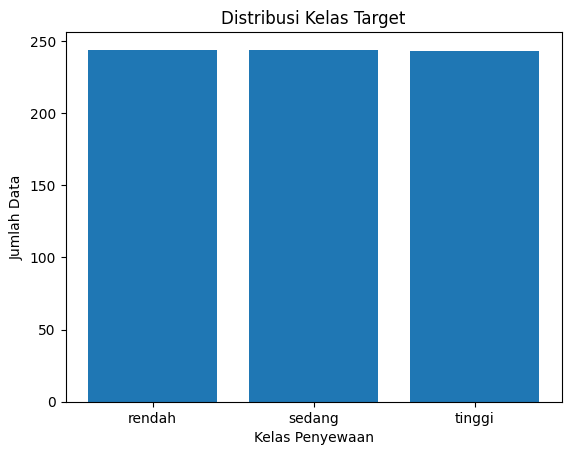

In [54]:
# @title Distribusi Kelas Target
class_counts = df['cnt_class'].value_counts()

plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Kelas Penyewaan")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kelas Target")
plt.show()

/tmp/ipython-input-2371715202.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


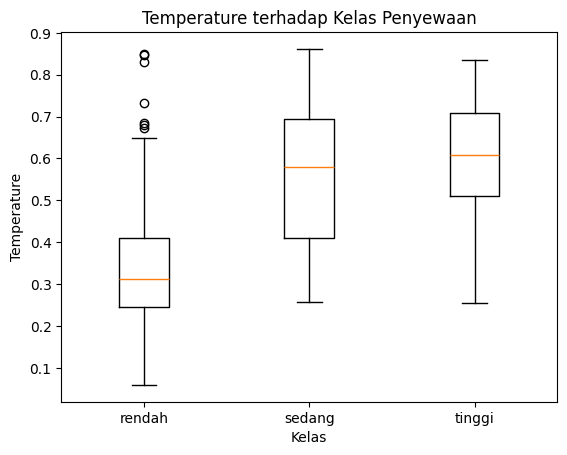

In [55]:
# @title Visualisasi Hubungan Temperature & Target
plt.figure()
plt.boxplot(
    [df[df['cnt_class']=='rendah']['temp'],
     df[df['cnt_class']=='sedang']['temp'],
     df[df['cnt_class']=='tinggi']['temp']],
    labels=['rendah','sedang','tinggi']
)
plt.xlabel("Kelas")
plt.ylabel("Temperature")
plt.title("Temperature terhadap Kelas Penyewaan")
plt.show()

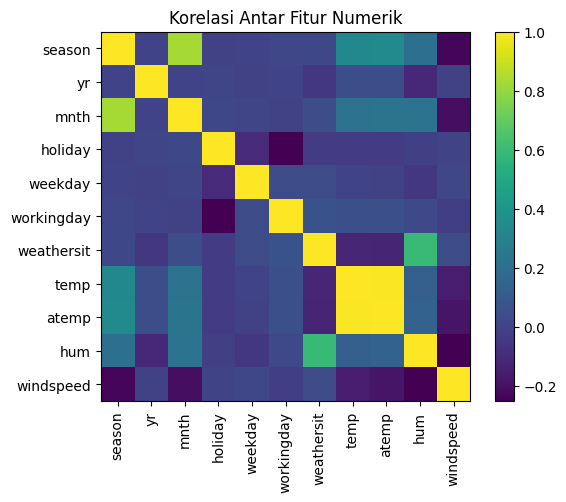

In [56]:
corr = df.drop(columns=['cnt_class']).corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

## Explanatory Analysis
1. Grafik distribusi kelas target yang saya tunjukkan adalah bahwa jumlah data pada kelas rendah, sedang, dan tinggi hampir sama. Pemahaman saya adalah bahwa dataset tidak mengalami masalah ketidakseimbangan kelas (class imbalance). Kondisi ini menguntungkan dalam proses pemodelan karena model tidak akan bias terhadap salah satu kelas tertentu.

2. Grafik boxplot saya tunjukkan bahwa adanya perbedaan distribusi temperatur pada setiap kelas penyewaan. Kelas penyewaan rendah memiliki median temperatur yang lebih rendah dibandingkan kelas sedang dan tinggi. Sementara itu, kelas penyewaan tinggi cenderung terjadi pada temperatur yang lebih tinggi. Hal ini mengindikasikan bahwa temperatur memiliki hubungan dengan tingkat penyewaan, di mana suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan.

3. Dari exploratory data analysis ini terlihat bahwa sebagian besar fitur numerik tidak saling berkorelasi kuat, artinya masing-masing membawa informasi yang berbeda. Korelasi paling menonjol ada pada temp dan atemp yang sangat tinggi karena keduanya sama-sama merepresentasikan suhu, serta season dan mnth yang menunjukkan pola musiman. Selain itu, holiday dan workingday berkorelasi negatif seperti yang diharapkan, sementara windspeed cenderung berdiri sendiri karena korelasinya lemah dengan fitur lain.
